📌 Introdução e Enquadramento do Problema
📖 Introdução

O conjunto de dados utilizado nesta análise contém propriedades físico-químicas de amostras de vinho branco.
Cada linha representa uma amostra diferente de vinho, com características como acidez, açúcar residual, pH, sulfatos, teor alcoólico e outras.
O objetivo principal é entender como essas propriedades químicas afetam a qualidade do vinho, que é avaliada em uma escala.

🎯 Declaração do Problema

Nosso objetivo é construir modelos de aprendizado de máquina capazes de prever a qualidade de uma amostra de vinho com base em suas características.
A qualidade do vinhos é fornecida como um valor numérico (0–10).
Isso torna a tarefa um problema de aprendizado supervisionado, onde as variáveis de entrada são propriedades físico-químicas e a variável alvo é qualidade.

📌 Tipo de Problema

Como a qualidade do vinho é uma pontuação ordinal/numérica, o problema pode ser abordado como:

1️⃣ Regressão
→ Prever o valor exato da qualidade.

2️⃣ Classificação
→ Prever a categoria de qualidade do vinho: baixa, média ou alta.

✅ Objetivos

Realizar análise exploratória dos dados (EDA) para entender as relações entre as características e a qualidade do vinho.

Treinar modelos de aprendizado de máquina para prever a qualidade do vinho.

Avaliar o desempenho dos modelos e identificar as características mais importantes que influenciam o sabor.

🏆 Critérios de Sucesso

Um modelo bem-sucedido deve prever com precisão a qualidade do vinho e ajudar a identificar os principais fatores físico-químicos que influenciam o sabor.

In [20]:
import numpy as np
import pandas as pd

In [21]:
tabela = pd.read_csv("Modelando_vinhos.csv")
tabela

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,qualidade,alcool
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,6,"R$ 45.512,00"
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,6,"R$ 45.421,00"
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,6,"R$ 45.301,00"
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00"
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,6,"R$ 45.544,00"
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,39.00,24.0,92.0,99.114,3.27,0.50,6,"R$ 45.333,00"
4894,6.6,0.32,0.36,8.0,47.00,57.0,168.0,9.949,3.15,0.46,5,"R$ 45.452,00"
4895,6.5,0.24,0.19,1.2,41.00,30.0,111.0,99.254,2.99,0.46,6,"R$ 45.391,00"
4896,5.5,0.29,0.30,1.1,22.00,20.0,110.0,98.869,3.34,0.38,7,"R$ 45.516,00"


In [22]:
tabela.info() # verificando as informacoes da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            4898 non-null   float64
 1   acidez_volatil         4898 non-null   float64
 2   acido_citrico          4898 non-null   float64
 3   acucar_residual        4898 non-null   float64
 4   cloretos               4898 non-null   float64
 5   dioxido_enxofre_livre  4898 non-null   float64
 6   dioxido_enxofre_total  4898 non-null   float64
 7   densidade              4898 non-null   float64
 8   pH                     4898 non-null   float64
 9   sulfatos               4898 non-null   float64
 10  qualidade              4898 non-null   int64  
 11  alcool                 4898 non-null   object 
dtypes: float64(10), int64(1), object(1)
memory usage: 459.3+ KB


In [23]:
# verificando se a tabela tem valores vazios e a soma dos valores vazios
tabela.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloretos                 0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
pH                       0
sulfatos                 0
qualidade                0
alcool                   0
dtype: int64

In [24]:
tabela.describe() # mostra um resumo estatístico completo das colunas numéricas do DataFrame chamado tabela.
# count → quantidade de valores (exclui nulos)
# mean → média
# std → desvio padrão
# min → menor valor
# 25% → primeiro quartil
# 50% (median) → mediana
# 75% → terceiro quartil
# max → maior valor

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,qualidade
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,11.216659,0.334192,6.391415,40.608069,35.308085,138.360657,113.540098,3.188267,0.489847,5.877909
std,0.843868,67.987301,0.121020,5.072058,24.967489,17.007137,42.498065,232.603169,0.151001,0.114126,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.020000,2.000000,9.000000,0.990000,2.720000,0.220000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,33.000000,23.000000,108.000000,9.943000,3.090000,0.410000,5.000000
50%,6.800000,0.270000,0.320000,5.200000,41.000000,34.000000,134.000000,98.948500,3.180000,0.470000,6.000000
75%,7.300000,0.330000,0.390000,9.900000,48.000000,46.000000,167.000000,99.418000,3.280000,0.550000,6.000000
max,14.200000,965.000000,1.660000,65.800000,346.000000,289.000000,440.000000,999.000000,3.820000,1.080000,9.000000


In [25]:
# fazendo o processamento da tabela
# importando 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# 1- limpando o R$ alcool das colunas , removendo o R$ e converter para float
if tabela["alcool"].dtype == "object":
# Converte todos os valores da coluna para string, garantindo que operações de texto funcionem corretamente.
    tabela["alcool"] = (
         tabela["alcool"]
        .astype(str)
        .str.replace("R\$" , "", regex=True ) # remove o simbolo da moeda
        .str.replace(".", "" , regex=False) # remove os pontos do decimal
        .str.replace(",", ".", regex=False) # ajusta o separador  decimal
        )

tabela["alcool"] = pd.to_numeric(tabela["alcool"], errors='coerce')


<>:7: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:7: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
C:\Users\cleber\AppData\Local\Temp\ipykernel_13772\3929445756.py:7: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  .str.replace("R\$" , "", regex=True ) # remove o simbolo da moeda


In [27]:
# 2- Tratar valores vazios
# Opção 1: Preencher com a média (melhor para variáveis contínuas)
tabela.fillna(tabela.mean(numeric_only=True), inplace=True)
# O método fillna() preenche todos os valores NaN (ausentes) no DataFrame.
# inplace=True significa que a alteração é feita dentro do próprio DataFrame, sem precisar salvar em outra variável.
# Para cada coluna numérica: Encontra a média e Substitui cada NaN dessa coluna pelo valor da média correspondente

In [28]:
# 3- removendo duplicados
tabela.drop_duplicates(inplace=True)

In [32]:
# 4- Variavel de Entrada e Variavel ALvo
X = tabela.drop("qualidade", axis=1)  # X =  dados sem a coluna qualitdade → são as variáveis de entrada (features).
y = tabela["qualidade"]  # y = coluna quality → é a variável alvo (target), aquilo que queremos prever.

In [ ]:
# 5- Padronizando as Variaveis
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


In [38]:
# 6- Treinando com spli test
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size=0.2, random_state=42, stratify=y) 
# stratify=y Faz com que as proporções das classes de y sejam mantidas tanto em treino quanto em teste. Muito importante quando a tabela é desbalanceada.

In [39]:
print("\n✅ Pre-Processamento Concluido!")
print("Conjunto de treinamento :", x_train.shape)
print("Conjunto de teste :", x_test.shape)


✅ Pre-Processamento Concluido!
Conjunto de treinamento : (3168, 11)
Conjunto de teste : (793, 11)


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# verificar novamente as colunas numericas 
numeric_cols = tabela.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'qualidade', 'alcool'],
      dtype='object')

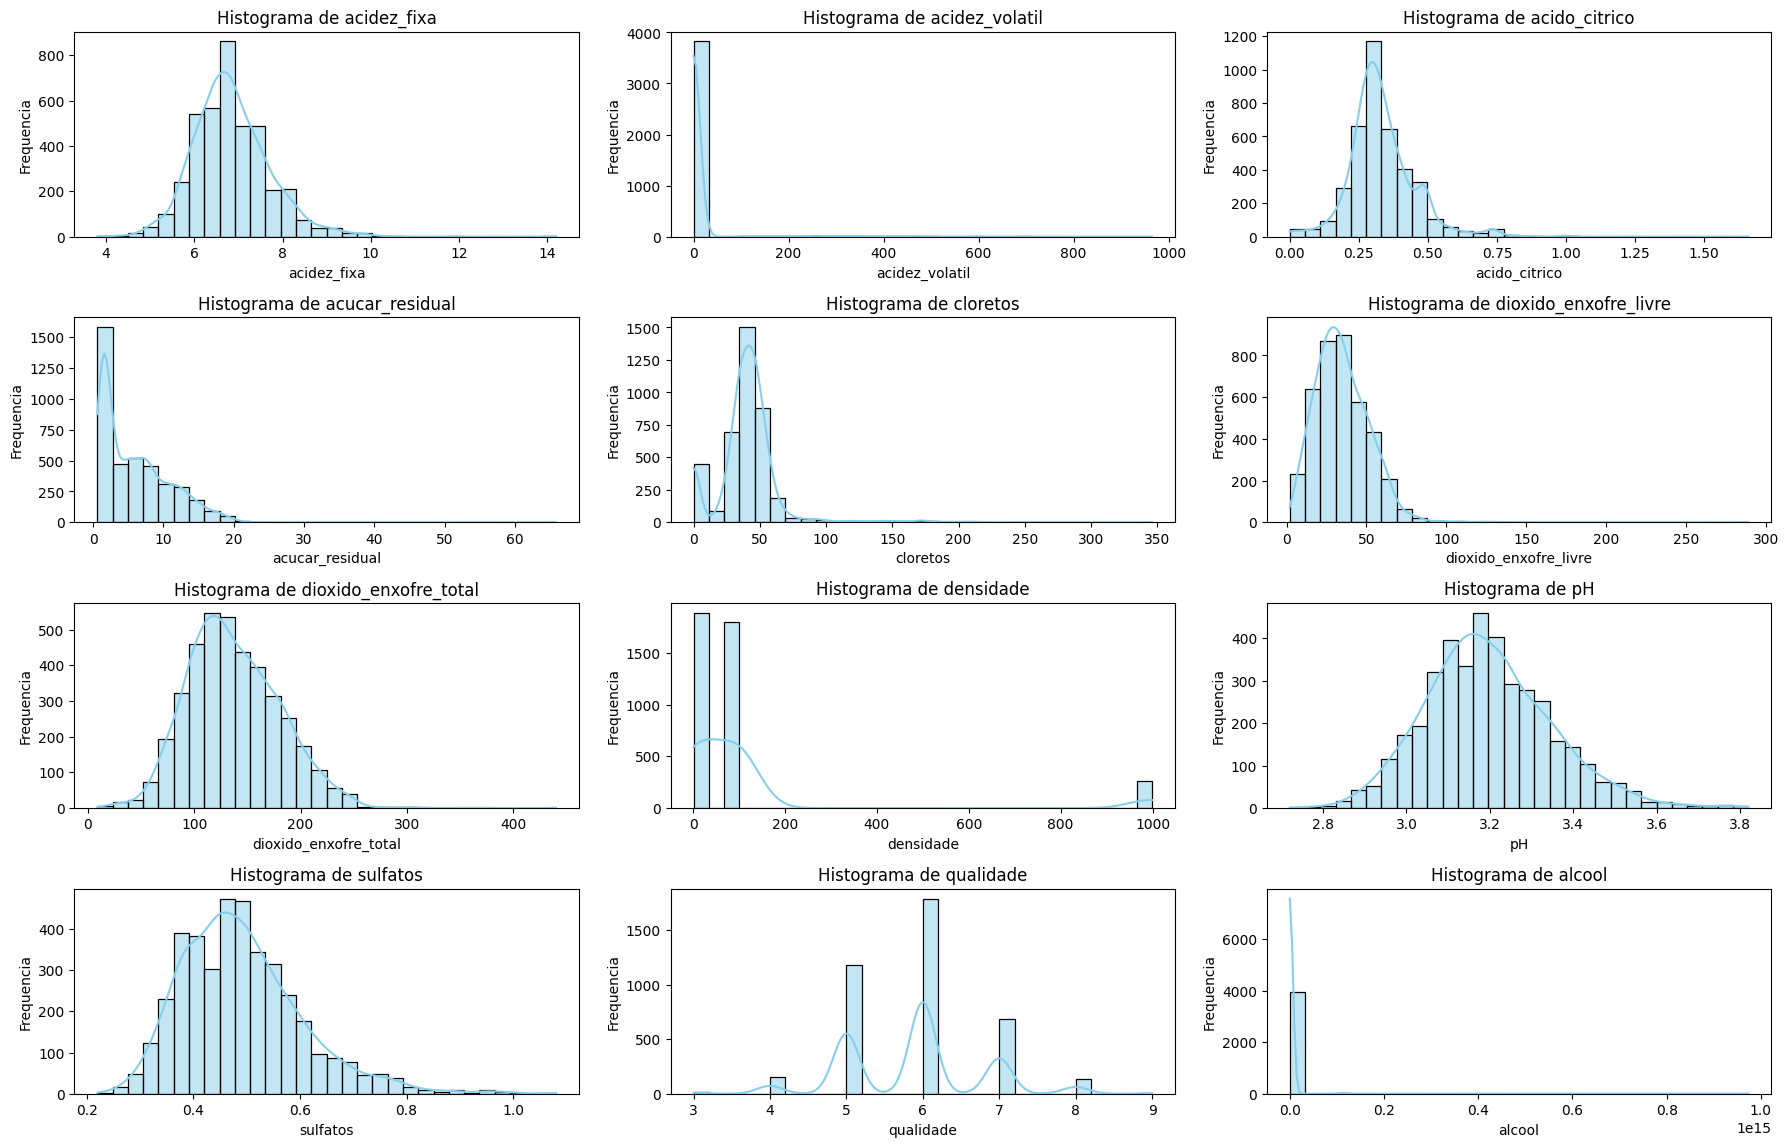

In [42]:
# Criando um histograma para as colunas

plt.figure(figsize=(18, 14))
for i, col in enumerate(numeric_cols, 1): # Um loop que percorre todas as colunas numéricas. i → número do gráfico (1, 2, 3…) col → nome da coluna atual / enumerate(..., 1) → começa a contar do 1 (não do 0)
    plt.subplot((len(numeric_cols) // 3) + 1, 3, i)
    sns.histplot(tabela[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histograma de {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequencia")
plt.tight_layout() # Ajusta automaticamente os espaços entre gráficos para que não se sobreponham.
plt.show()

In [43]:
# Gráficos de linha para todas as características importantes em relação à qualidade do vinho (com descrição)

sns.set(style="whitegrid") # Define um tema (fundo branco com grades leves) para deixar os gráficos mais bonitos
# selecionando as features

# Características, exceto o alvo
features = [col for col in tabela.columns if col != "qualidade"] # Essa linha faz uma list comprehension onde: tabela.columns = lista de todas as colunas , if col != "quality" → exclui a coluna quality, que é o alvo (target) O resultado final é uma lista contendo todas as variáveis preditoras.

In [44]:
# Imprimir descrição
print("📖 Sobre Graficos de Linha :")
print("- Lineplots mostram a tendência dos valores médios das variáveis conforme os níveis de qualidade do vinho.")
print("- Eles ajudam a identificar se uma variável aumenta, diminui ou permanece constante à medida que a qualidade melhora.")
print("- Úteis para identificar variáveis fortemente correlacionadas com a qualidade do vinho (como o teor alcoólico).")
print(" Neste conjunto de dados, os lineplots irão revelar como as propriedades químicas variam de acordo com as pontuações de qualidade do vinho.")


📖 Sobre Graficos de Linha :
- Lineplots mostram a tendência dos valores médios das variáveis conforme os níveis de qualidade do vinho.
- Eles ajudam a identificar se uma variável aumenta, diminui ou permanece constante à medida que a qualidade melhora.
- Úteis para identificar variáveis fortemente correlacionadas com a qualidade do vinho (como o teor alcoólico).
 Neste conjunto de dados, os lineplots irão revelar como as propriedades químicas variam de acordo com as pontuações de qualidade do vinho.


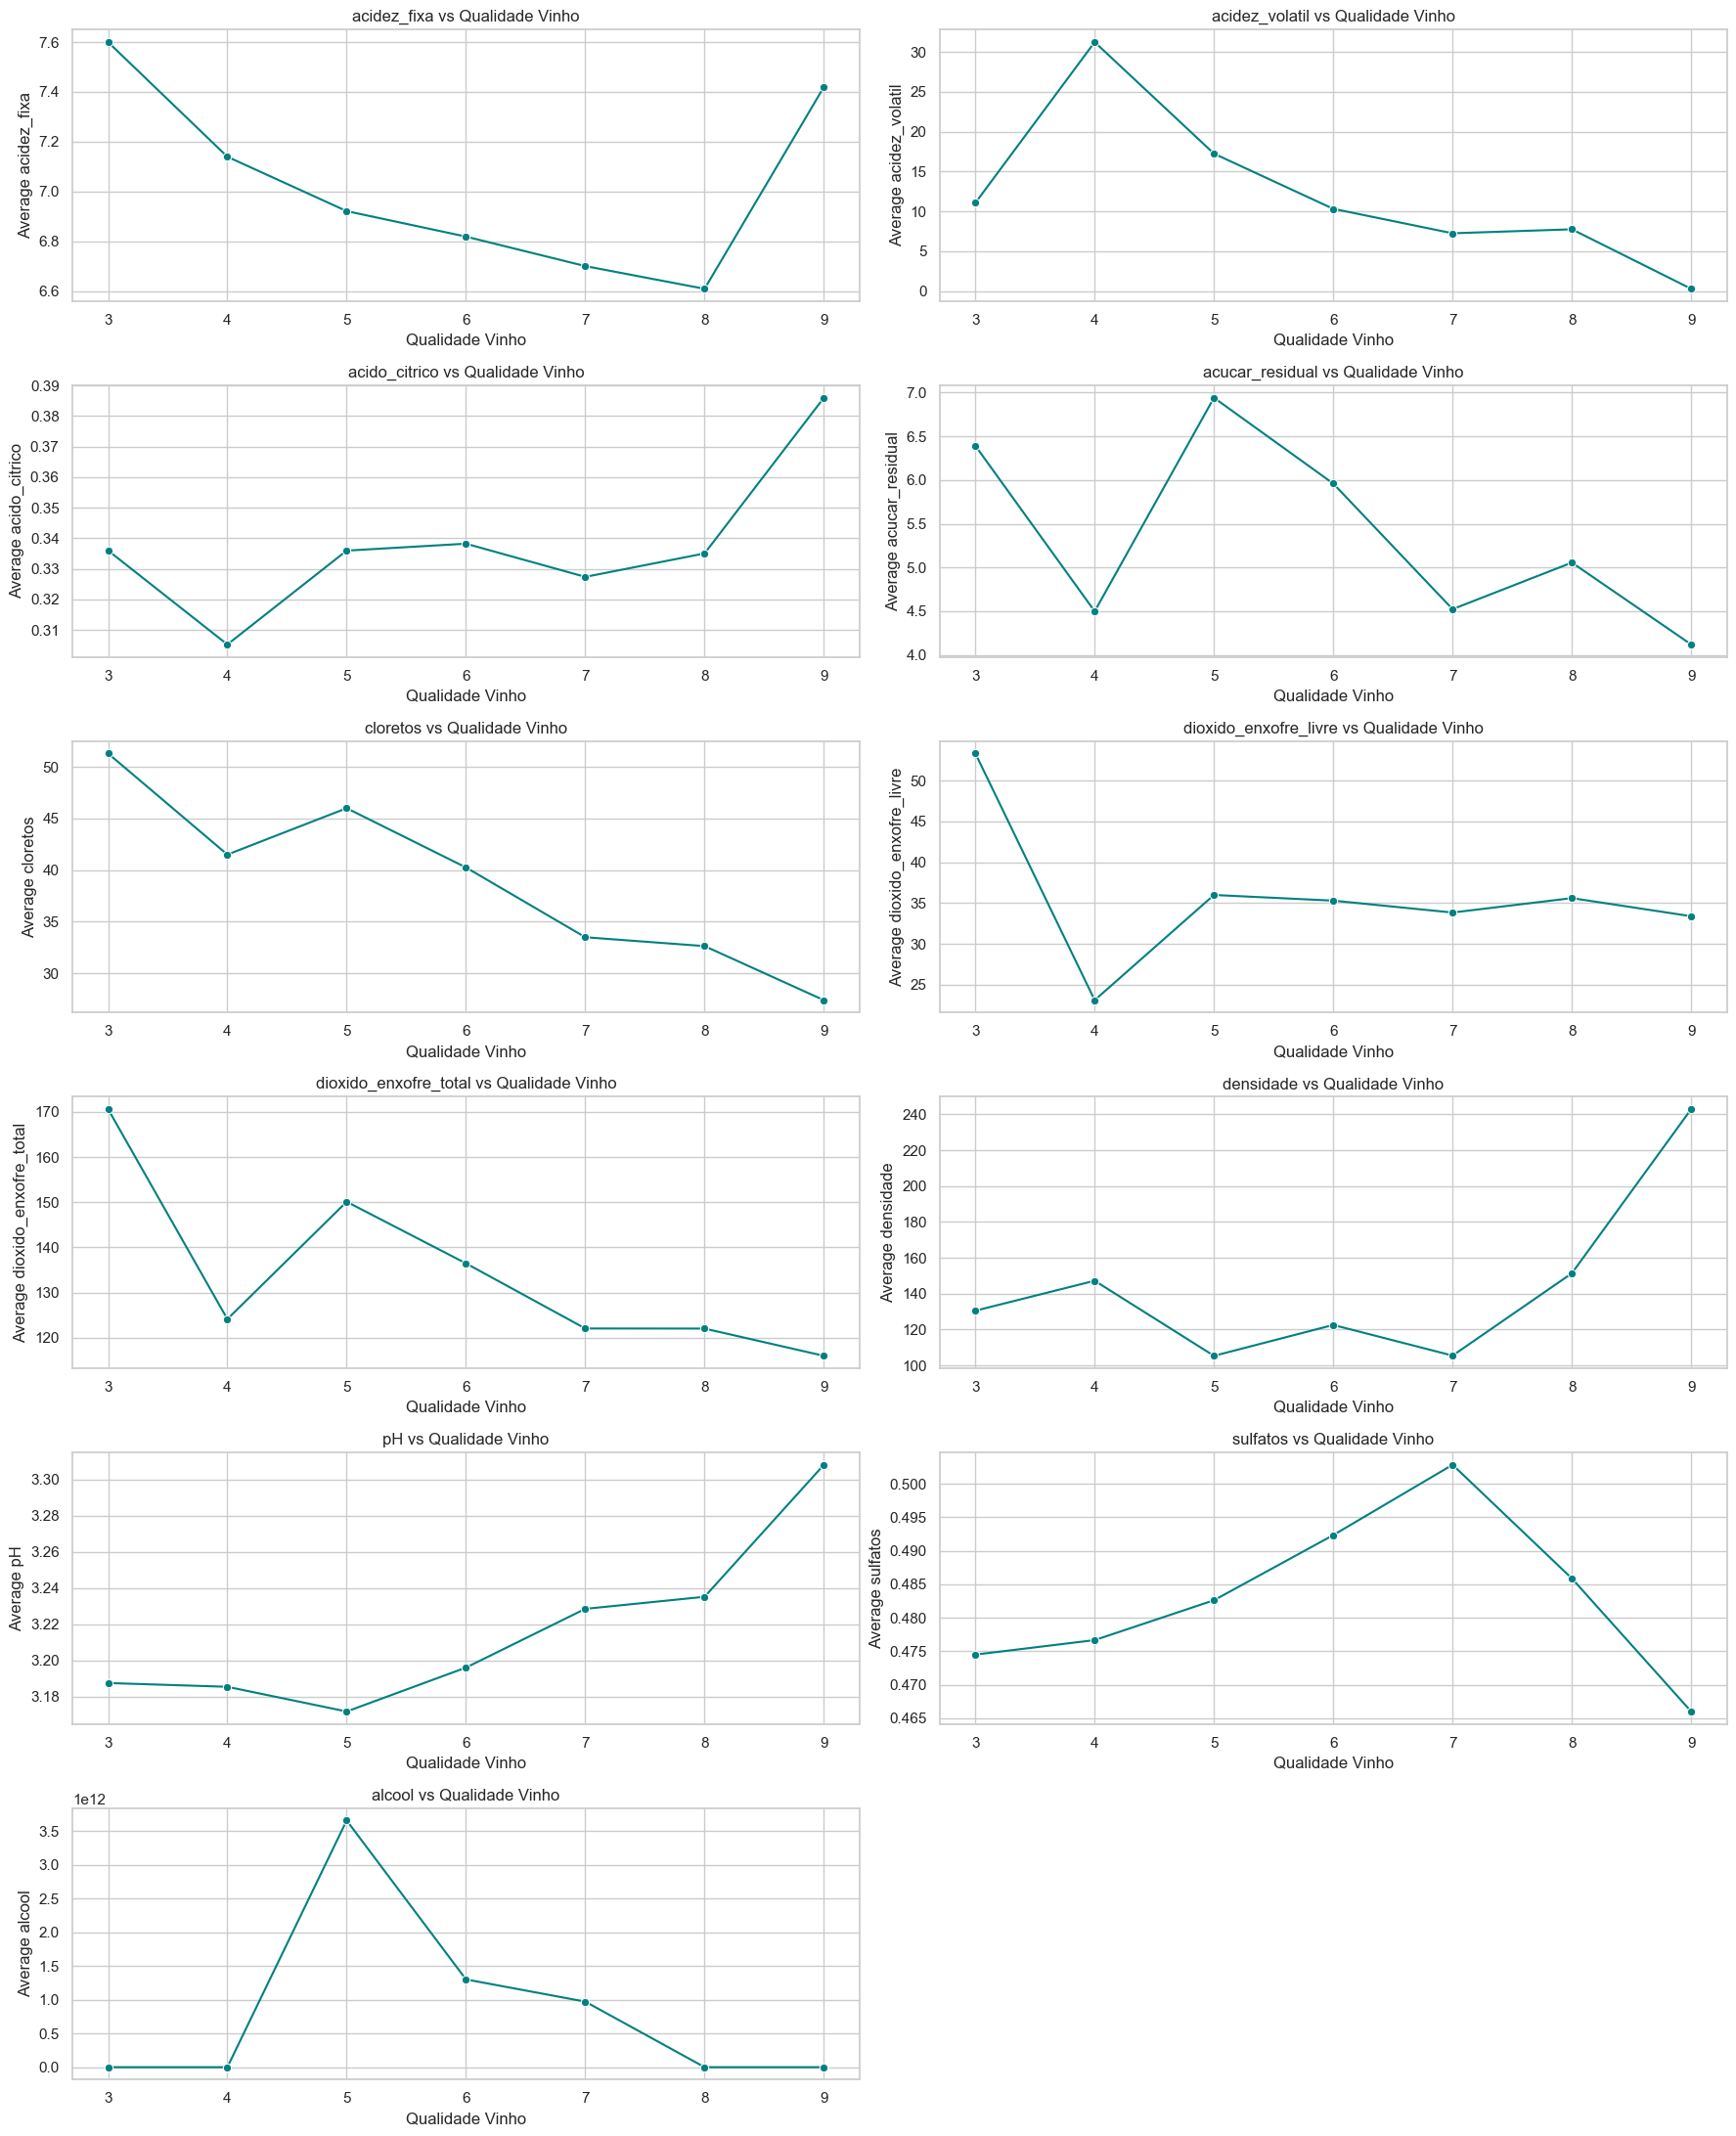

In [50]:
# gerando os graficos :
plt.figure(figsize=(18, 22))
for i, col in enumerate(features, 1):
    plt.subplot((len(features) // 2) + 1, 2, i) # Divide a tela em várias linhas e duas colunas. (len(features) // 2) + 1 calcula quantas linhas serão necessárias.i indica a posição do próximo gráfico. Assim, cada variável ganha seu próprio gráfico.
    sns.lineplot(x="qualidade", y=col, data=tabela, marker="o", errorbar=None , color="teal") # ✔ marker="o" Coloca bolinhas nos pontos da linha → mais fácil visualizar padrões. / errorbar=None Desativa intervalo de confiança (para evitar poluição visual). color="teal" Define a cor da linha.
    plt.title(f"{col} vs Qualidade Vinho", fontsize=12) # Cria um título para cada gráfico.
    plt.xlabel("Qualidade Vinho") # Nome dos eixos X e Y.
    plt.ylabel(f"Average {col}") # O f"{col}" coloca automaticamente o nome da coluna no título e no eixo.
plt.tight_layout()
plt.show()

In [46]:
# Boxplots para cada caracteristica vs. qualidade do vinho

print("Sobre Boxplots:")
print("- Boxplots ajudam a visualizar a distribuição das variáveis em relação aos níveis de qualidade do vinho.")
print("- A caixa representa o intervalo interquartil (IQR), e a linha interna é a mediana.")
print("- Os 'whiskers' mostram a dispersão dos dados, e os pontos representam outliers.")
print("- Eles permitem comparar como diferentes variáveis se comportam entre as classes de qualidade do vinho.")
print("Neste conjunto de dados, os boxplots mostrarão como as propriedades químicas (como acidez, açúcar, álcool) diferem entre vinhos de baixa e alta qualidade.")


Sobre Boxplots:
- Boxplots ajudam a visualizar a distribuição das variáveis em relação aos níveis de qualidade do vinho.
- A caixa representa o intervalo interquartil (IQR), e a linha interna é a mediana.
- Os 'whiskers' mostram a dispersão dos dados, e os pontos representam outliers.
- Eles permitem comparar como diferentes variáveis se comportam entre as classes de qualidade do vinho.
Neste conjunto de dados, os boxplots mostrarão como as propriedades químicas (como acidez, açúcar, álcool) diferem entre vinhos de baixa e alta qualidade.


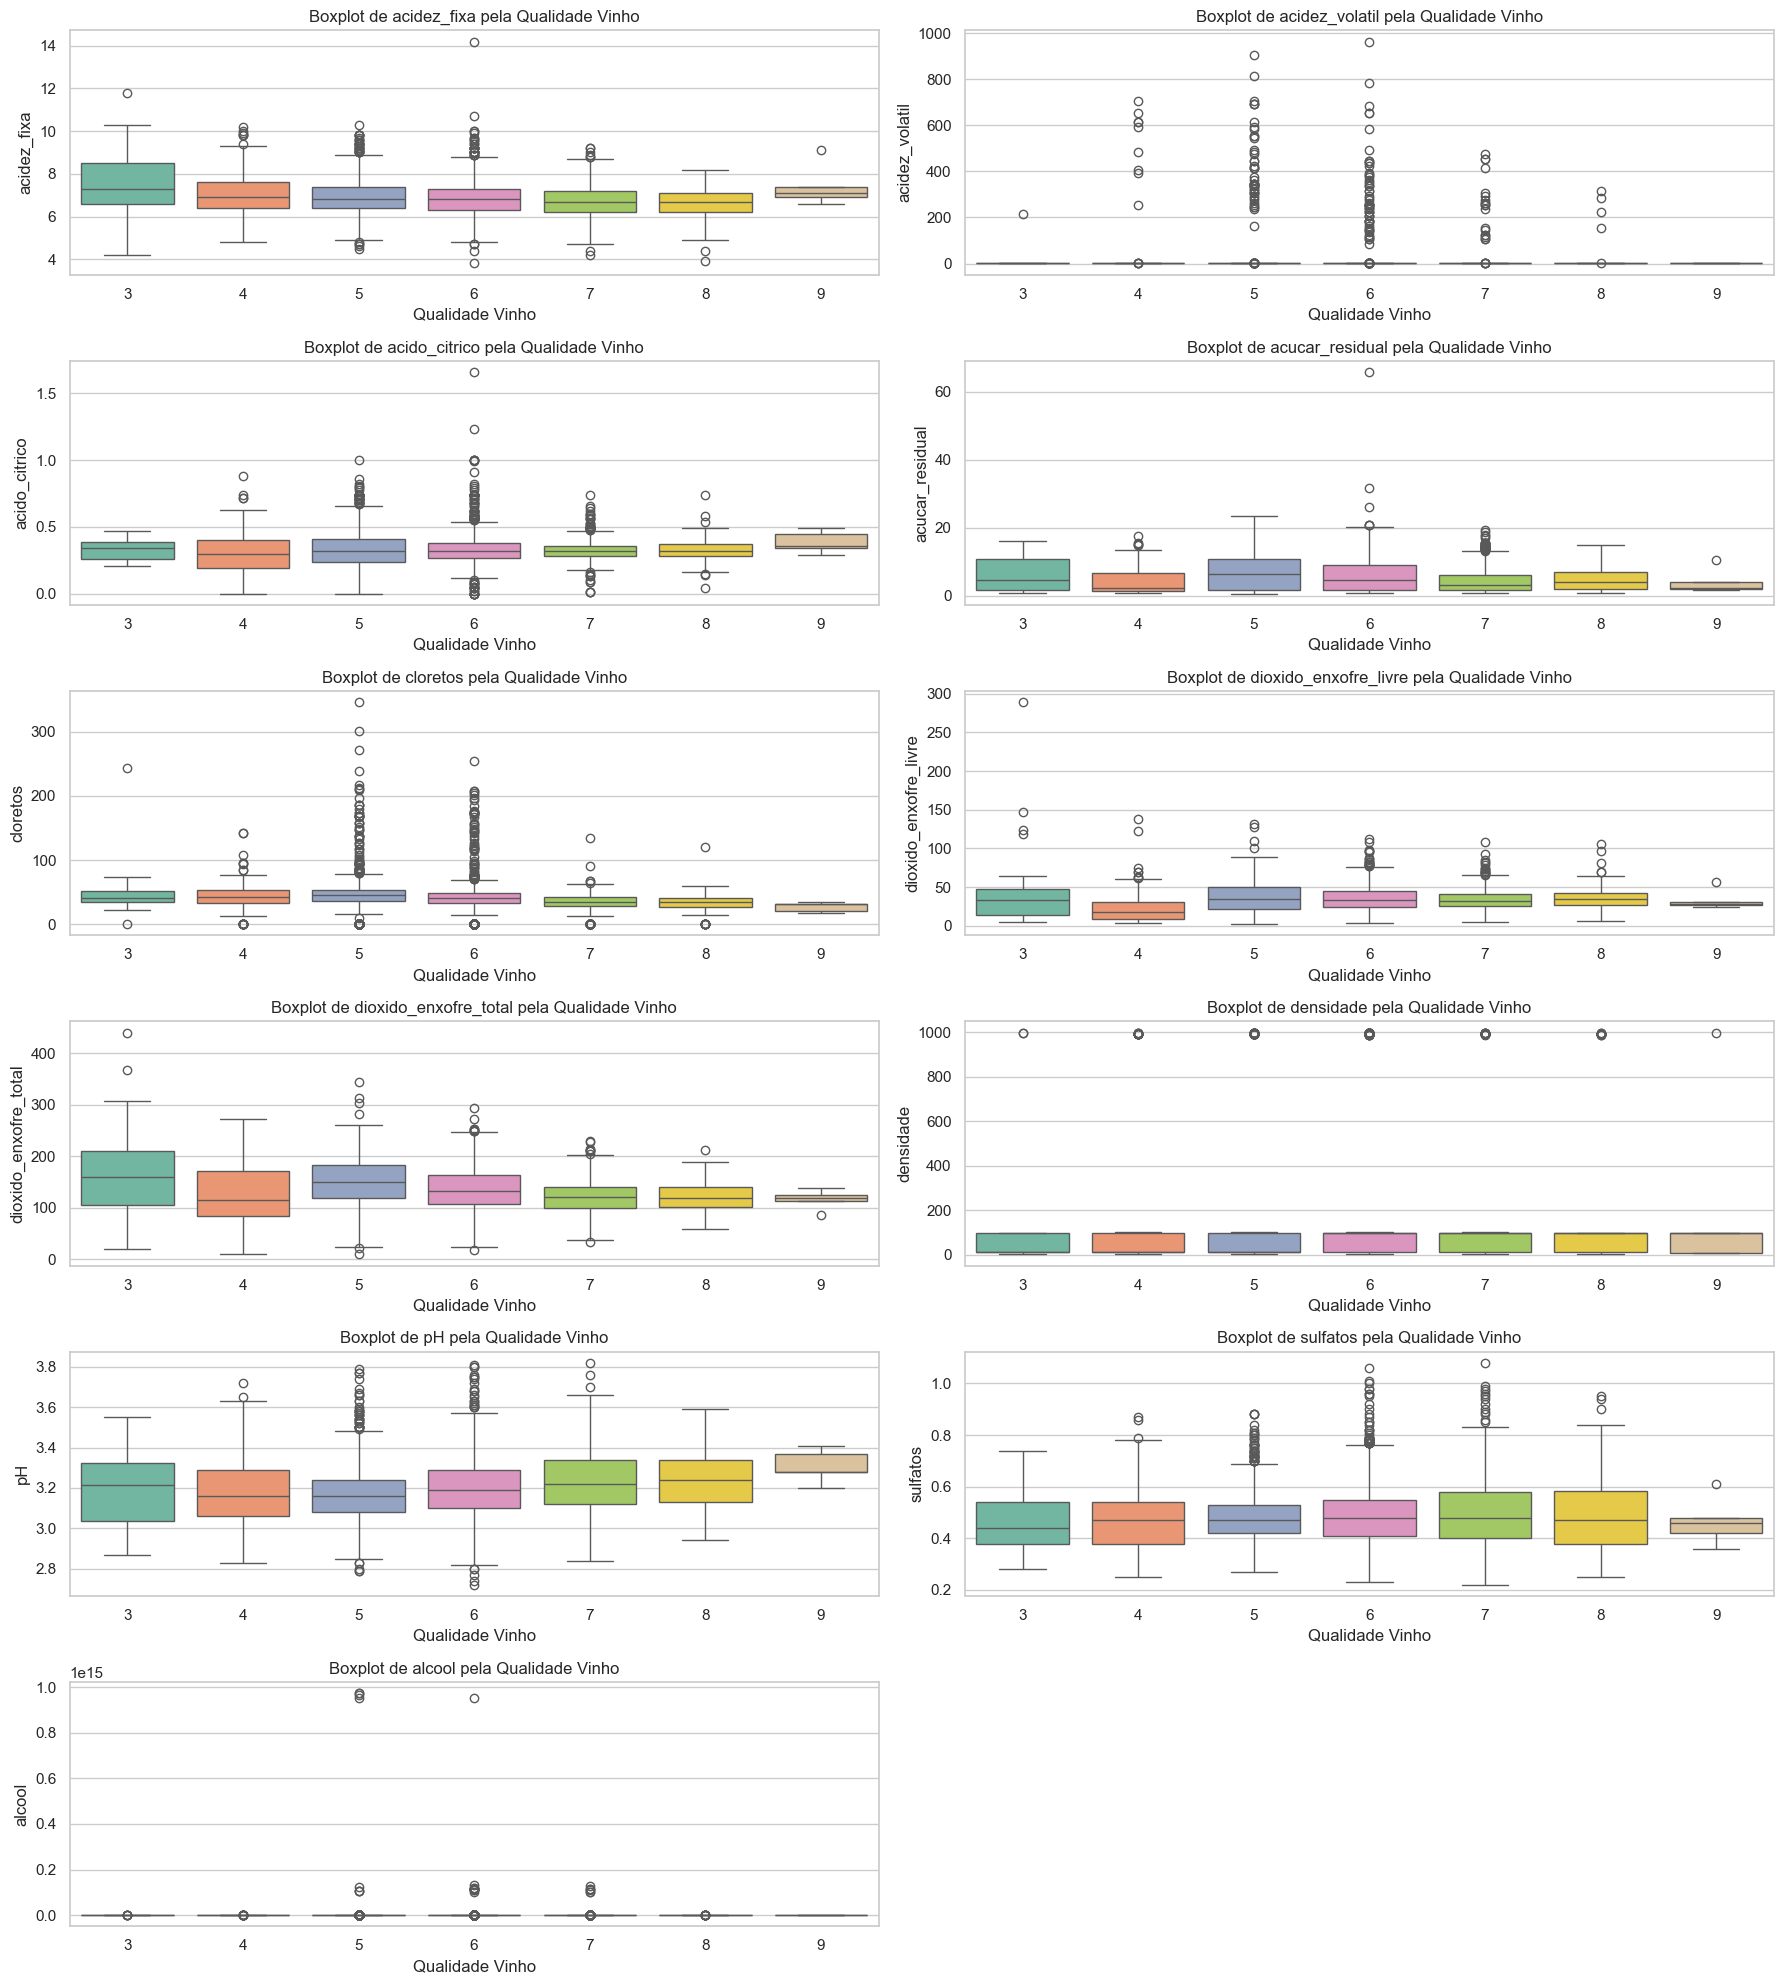

In [56]:
# Gerando boxplots
plt.figure(figsize=(18, 20))
for i, col in enumerate(features, 1):
    plt.subplot((len(features) // 2) + 1, 2, i)
    sns.boxplot(x="qualidade", y=col, data=tabela,hue="qualidade" ,palette="Set2", legend=False)
    plt.title(f"Boxplot de {col} pela Qualidade Vinho", fontsize=12) # Um título com o nome da variável
    plt.xlabel("Qualidade Vinho") # Rótulo do eixo X (Qualidade do vinho)
    plt.ylabel(col) # Rótulo do eixo Y (nome da variável atual)
plt.tight_layout()
plt.show()

# O que o boxplot mostra?
# Mediana
# Intervalo interquartil (IQR)
# Dispersão dos dados
# Outliers
# Diferenças entre as categorias de qualidade
# Isso ajuda a perceber padrões como:
# Vinhos de alta qualidade normalmente têm mais álcool?
# O pH varia pouco entre qualidades?
# A acidez volátil é maior em vinhos de baixa qualidade?

In [57]:
# Gráficos de violino para todas as características importantes versus a qualidade do vinho (com descrição)

print("Sobre Violinplots:")
print("- Violinplots combinam as características de boxplots e gráficos de densidade (kernel density plots).")
print("- Eles mostram a mediana, o intervalo interquartil (como os boxplots) E a distribuição completa dos dados (densidade).")
print("- Seções mais largas do violino indicam maior densidade de dados, enquanto seções mais estreitas indicam menos pontos de dados.")
print("- Neste conjunto de dados, os violinplots revelarão como cada propriedade química se distribui entre os diferentes níveis de qualidade do vinho.")

Sobre Violinplots:
- Violinplots combinam as características de boxplots e gráficos de densidade (kernel density plots).
- Eles mostram a mediana, o intervalo interquartil (como os boxplots) E a distribuição completa dos dados (densidade).
- Seções mais largas do violino indicam maior densidade de dados, enquanto seções mais estreitas indicam menos pontos de dados.
- Neste conjunto de dados, os violinplots revelarão como cada propriedade química se distribui entre os diferentes níveis de qualidade do vinho.


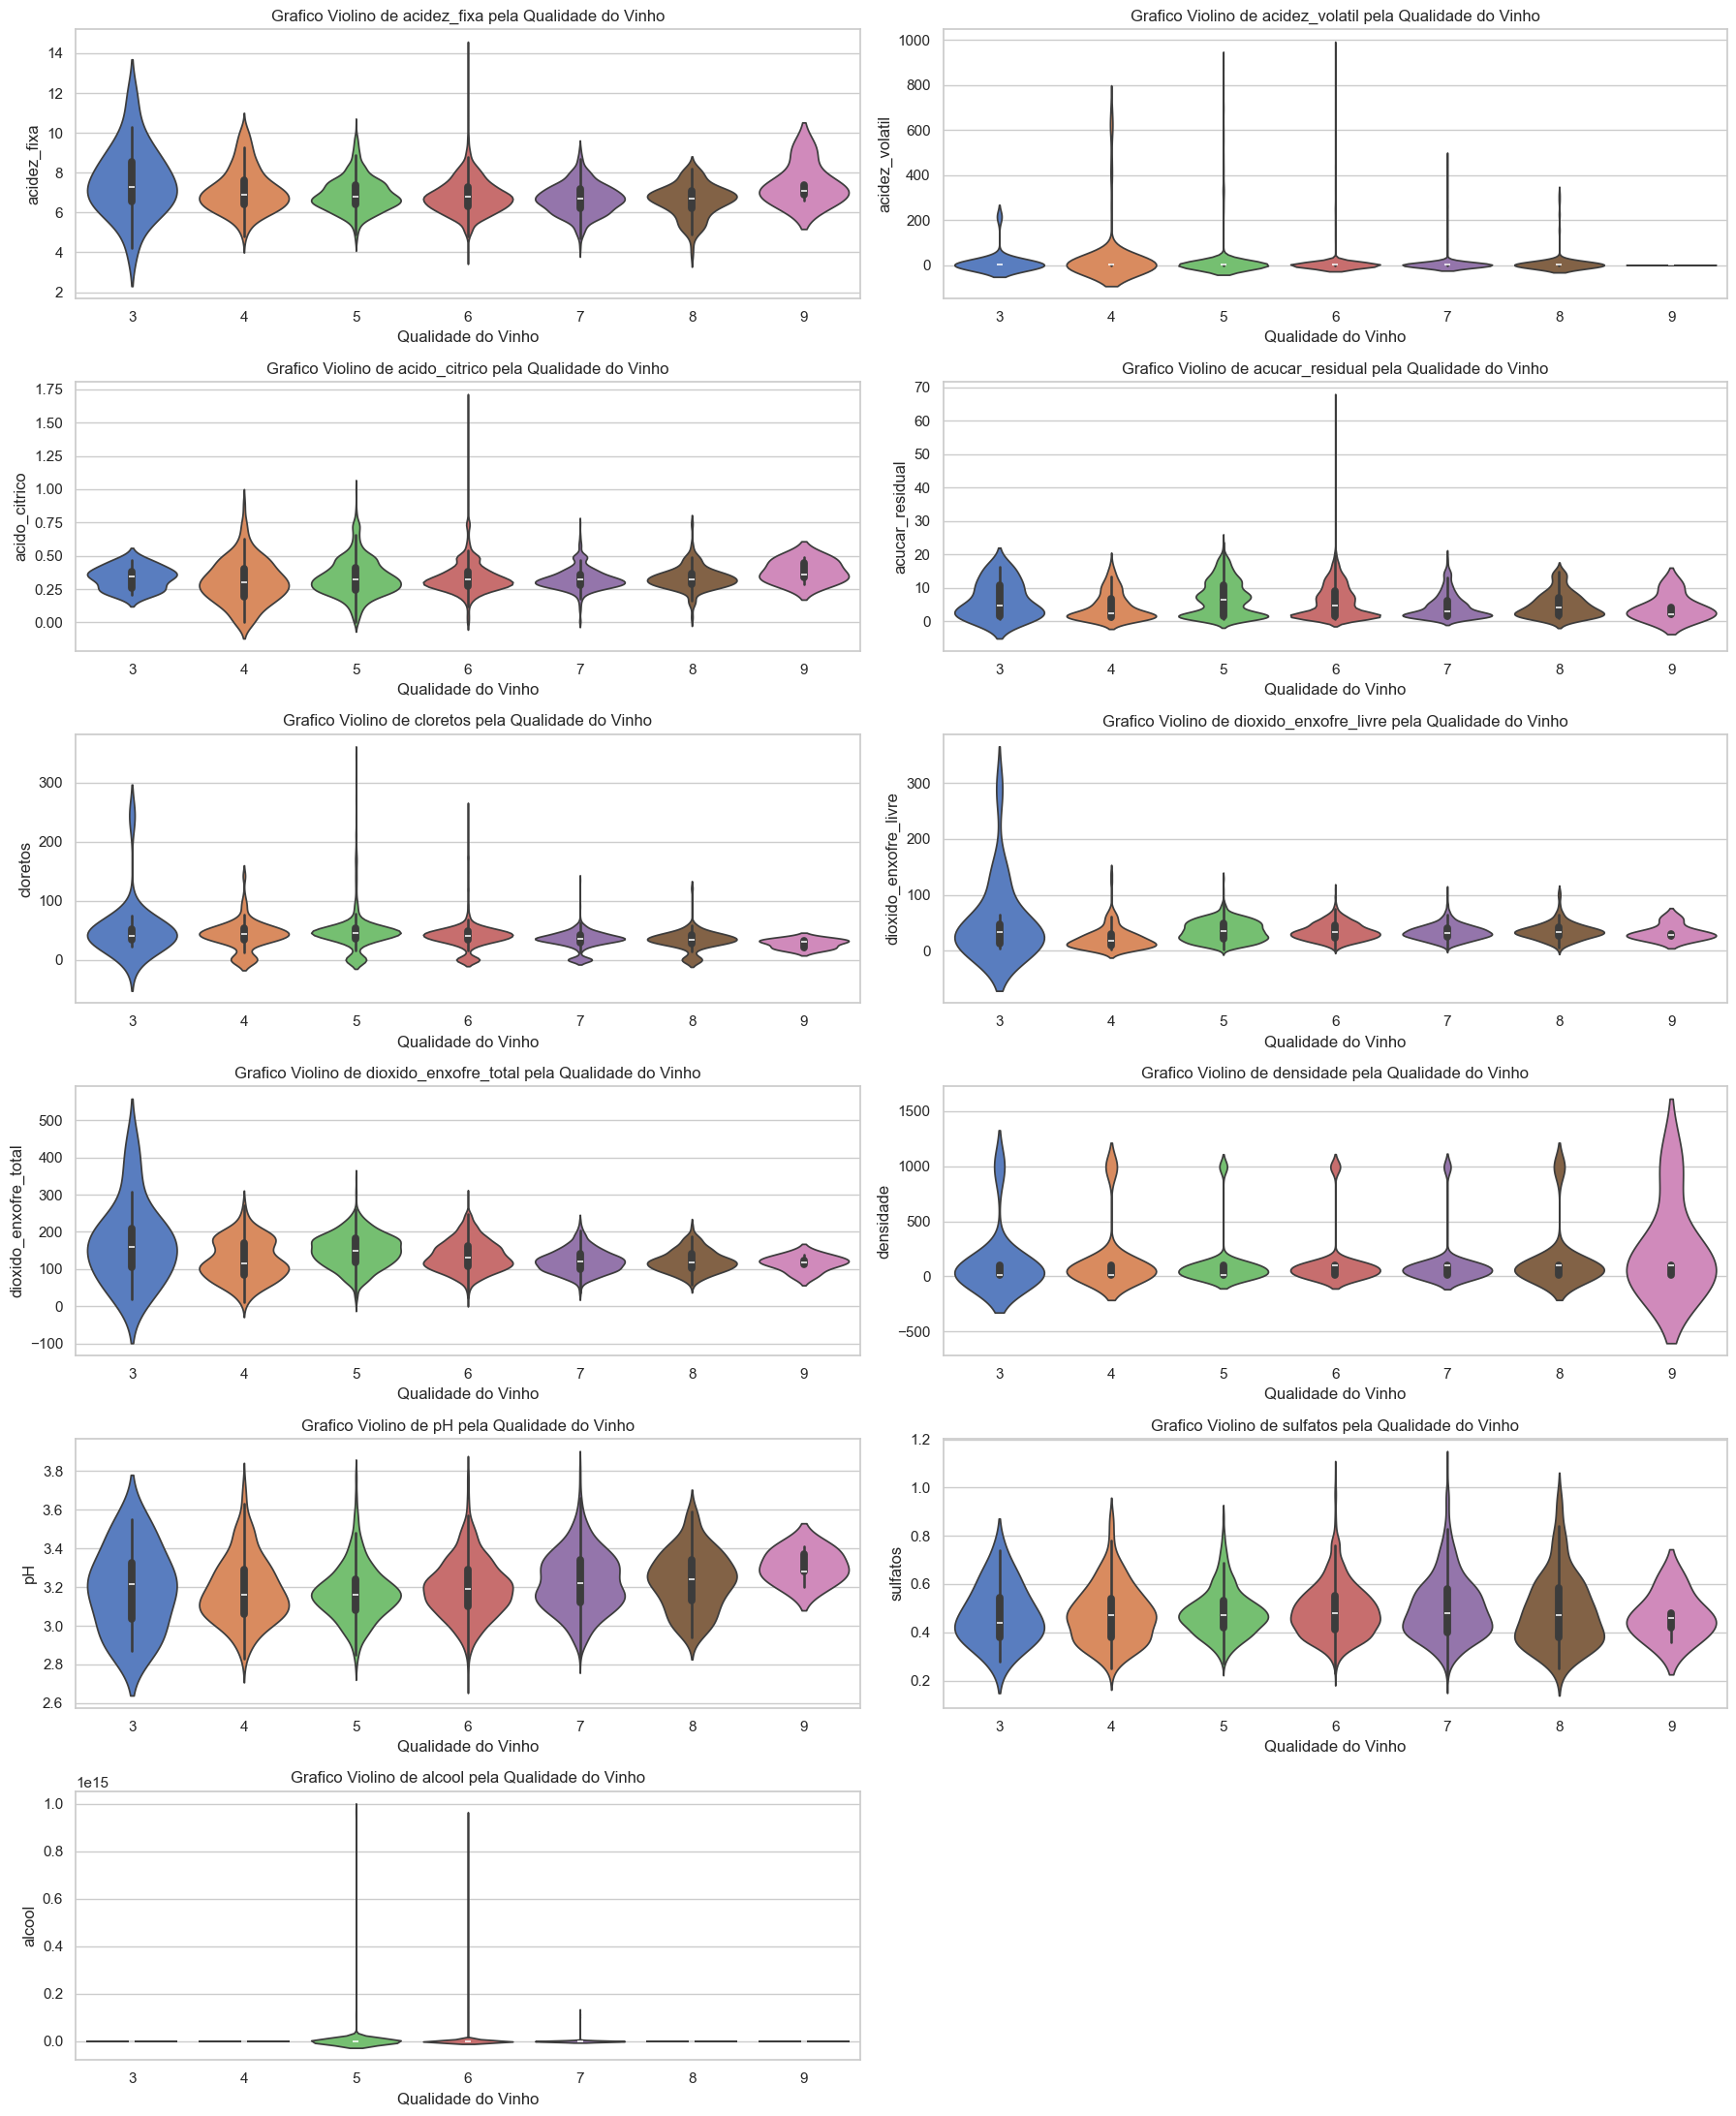

In [61]:
# Gerando graficos de violinos
plt.figure(figsize=(18, 22))
for i, col in enumerate(features, 1):
    plt.subplot((len(features) // 2) + 1, 2, i)
    sns.violinplot(x="qualidade", y=col, data=tabela, hue="qualidade",palette="muted",legend=False, inner="box")
    plt.title(f"Grafico Violino de {col} pela Qualidade do Vinho", fontsize=12)
    plt.xlabel("Qualidade do Vinho")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [77]:
# Pairplot para Caracteristicas Importantes vs. Boa Qualidade de Vinho
# Selecao da caracteristicas im,portantes:

caracteristicas_importantes = [
    "alcool",
    "pH",
    "acidez_volatil",
    "acucar_residual",
    "densidade",
    "qualidade"
]

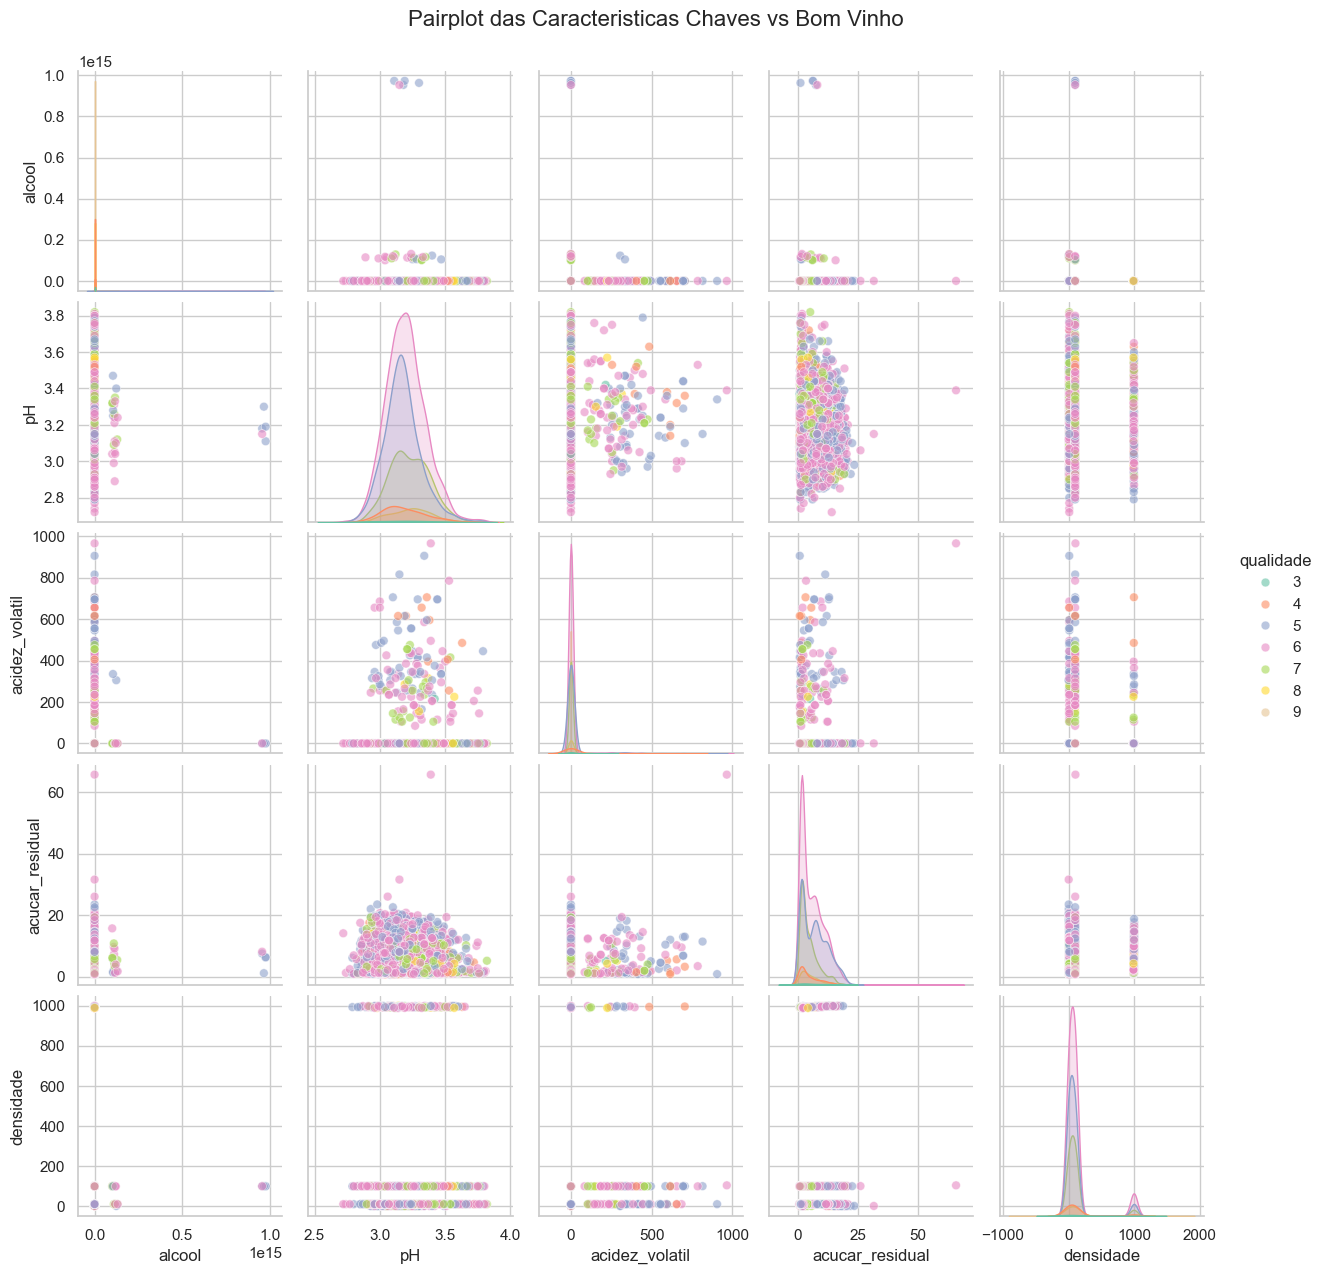

In [78]:
# Criando o Pairplot
sns.pairplot(tabela[caracteristicas_importantes], 
             hue="qualidade", 
             palette="Set2", 
             diag_kind="kde",
             plot_kws={"alpha":0.6, "s":40})
# tabela[caracteristicas_importantes → seleciona somente as colunas de interesse.
# hue="qualidade" → colore os pontos de acordo com a categoria de boa qualidade do vinho.
# palette="Set2" → define a paleta de cores para cada categoria.
# diag_kind="kde" → nas diagonais, mostra estimativa de densidade (KDE) ao invés de histogramas.
# plot_kws={"alpha":0.6, "s":40} → ajusta: alpha=0.6 → transparência dos pontos (para sobreposição de pontos) s=40 → tamanho dos pontos no scatter plot
plt.suptitle("Pairplot das Caracteristicas Chaves vs Bom Vinho", y=1.02, fontsize=16)
plt.show()
